<a href="https://colab.research.google.com/github/Maratinhos/hw/blob/master/Kaggle_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import files
import pandas as pd
%matplotlib inline

In [67]:
file = files.upload()

Saving kaggle.json to kaggle.json


In [0]:
!ls

kaggle.json  sample_data


In [0]:
!mkdir ~/.kaggle

In [0]:
!mv kaggle.json ~/.kaggle

In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [0]:
!kaggle competitions download -c titanic

  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 51.6MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 23.6MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 3.26MB/s]


In [0]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [259]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
df['Sex'] = df['Sex'].replace('male', 0)
df['Sex'] = df['Sex'].replace('female', 1)
df['Embarked'] = df['Embarked'].replace('S', 0)
df['Embarked'] = df['Embarked'].replace('C', 1)
df['Embarked'] = df['Embarked'].replace('Q', 2)

In [0]:
df_test['Sex'] = df_test['Sex'].replace('male', 0)
df_test['Sex'] = df_test['Sex'].replace('female', 1)
df_test['Embarked'] = df_test['Embarked'].replace('S', 0)
df_test['Embarked'] = df_test['Embarked'].replace('C', 1)
df_test['Embarked'] = df_test['Embarked'].replace('Q', 2)

In [0]:
x = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df['Survived']

In [0]:
x_test = df_test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

In [0]:
x = x.fillna(x.mean())

In [0]:
x_test = x_test.fillna(x_test.mean())

In [0]:
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.2, shuffle=True)

In [0]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.fit_transform(x_val)

In [0]:
x_test_scaled = scaler.fit_transform(x_test)

In [0]:
x_train_scaled = x_train_scaled.astype(np.float32)
x_val_scaled = x_val_scaled.astype(np.float32)
y_train = y_train.astype(np.float32)
y_val = y_val.astype(np.float32)

In [0]:
x_test_scaled = x_test_scaled.astype(np.float32)

In [0]:
x_train_scaled = np.array(x_train_scaled)
x_val_scaled = np.array(x_val_scaled)
y_train = np.array(y_train)
y_val = np.array(y_val)

In [0]:
x_test_scaled = np.array(x_test_scaled)

In [0]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(7,)),
    #BatchNormalization(),
    #Dropout(0.3),
    Dense(32, activation='relu'),
    #BatchNormalization(),
    #Dropout(0.3),
    Dense(64, activation='relu'),
    #BatchNormalization(),
    #Dropout(0.3),
    #Dense(512, activation='relu'),
    #BatchNormalization(),
    #Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

checkpoint = ModelCheckpoint('kaggle-titanic.hdf5', monitor = 'val_acc', save_best_only = True, verbose = 1, mode = 'max')

learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_acc', patience = 3, verbose = 1, factor = 0.1, min_lr = 0.0000001)

early_stopping = EarlyStopping(monitor = 'val_loss', patience = 10, verbose = 1, restore_best_weights = True)

In [276]:
history = model.fit(x_train_scaled, 
                    y_train, 
                    batch_size = 128,
                    validation_data = (x_val_scaled, y_val), 
                    epochs = 100,
                    verbose = 1,
                    callbacks = [checkpoint, learning_rate_reduction, early_stopping])

Train on 712 samples, validate on 179 samples
Epoch 1/100
128/712 [====>.........................] - ETA: 1s - loss: 0.6910 - acc: 0.4219
Epoch 00001: val_acc improved from -inf to 0.67598, saving model to kaggle-titanic.hdf5
712/712 [==============================] - 4s 5ms/sample - loss: 0.6794 - acc: 0.5787 - val_loss: 0.6575 - val_acc: 0.6760
Epoch 2/100
128/712 [====>.........................] - ETA: 0s - loss: 0.6536 - acc: 0.6875
Epoch 00002: val_acc improved from 0.67598 to 0.75978, saving model to kaggle-titanic.hdf5
712/712 [==============================] - 0s 76us/sample - loss: 0.6367 - acc: 0.7233 - val_loss: 0.6161 - val_acc: 0.7598
Epoch 3/100
128/712 [====>.........................] - ETA: 0s - loss: 0.6014 - acc: 0.8047
Epoch 00003: val_acc improved from 0.75978 to 0.77095, saving model to kaggle-titanic.hdf5
712/712 [==============================] - 0s 66us/sample - loss: 0.5994 - acc: 0.7781 - val_loss: 0.5767 - val_acc: 0.7709
Epoch 4/100
128/712 [====>...........

In [0]:
model.load_weights('kaggle-titanic.hdf5')

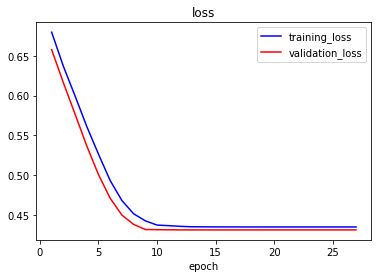

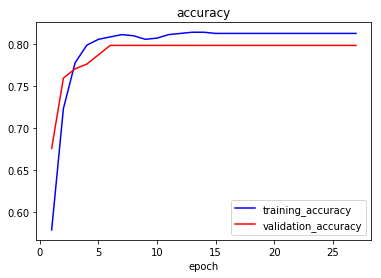

In [277]:
# Training plots
epochs = [i for i in range(1, len(history.history['loss'])+1)]

plt.plot(epochs, history.history['loss'], color='blue', label="training_loss")
plt.plot(epochs, history.history['val_loss'], color='red', label="validation_loss")
plt.legend(loc='best')
plt.title('loss')
plt.xlabel('epoch')
plt.show()

plt.plot(epochs, history.history['acc'], color='blue', label="training_accuracy")
plt.plot(epochs, history.history['val_acc'], color='red',label="validation_accuracy")
plt.legend(loc='best')
plt.title('accuracy')
plt.xlabel('epoch')
plt.show()

In [0]:
y_pred = model.predict(x_test_scaled)
y_final = (predictions > 0.5).astype(int).reshape(df_test.shape[0])
    
output = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': y_final})
output.to_csv('prediction.csv', index=False)

In [279]:
output.describe()

,PassengerId,Survived
count,418.000000,418.0
mean,1100.500000,0.0
std,120.810458,0.0
min,892.000000,0.0
25%,996.250000,0.0
50%,1100.500000,0.0
75%,1204.750000,0.0
max,1309.000000,0.0
